In [1]:
#1. ZIP Faylni Yuklab Olish va Ajratish
#Birinchi qadam – ZIP faylni ochib, papkalarni tekshirish:

import zipfile
import os

zip_path = "/content/pnevmoniya.zip"  # ZIP faylingizning joylashuvi
extract_path = "data"  # Fayllarni chiqarish uchun katalog

# ZIP faylni ochish va ajratish
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Fayllar muvaffaqiyatli ajratildi!")

FileNotFoundError: [Errno 2] No such file or directory: '/content/pnevmoniya.zip'

In [ ]:
import os
os.listdir(extract_path)

['test', 'train', 'sample_solution.csv']

In [ ]:
from pathlib import Path

data_path = Path("/content/data")
train_path = data_path / "train"
test_path = data_path / "test"

print("Train sinf nomlari:", os.listdir(train_path))
print("Test fayllar soni:", len(os.listdir(test_path)))


Train sinf nomlari: ['PNEUMONIA', 'NORMAL']
Test fayllar soni: 624


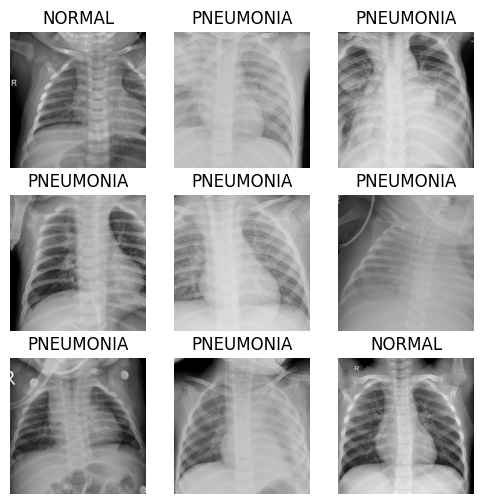

In [ ]:
from fastai.vision.all import *


path = data_path

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
)

dls = dblock.dataloaders(train_path, bs=32)
dls.show_batch(max_n=9, figsize=(6,6))

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.393216,0.161556,0.950144,01:38


epoch,train_loss,valid_loss,accuracy,time
0,0.156168,0.089841,0.971237,01:37
1,0.118954,0.065069,0.975072,01:39
2,0.069657,0.055922,0.983701,01:37
3,0.027568,0.044306,0.988495,01:35
4,0.024965,0.039797,0.988495,01:34


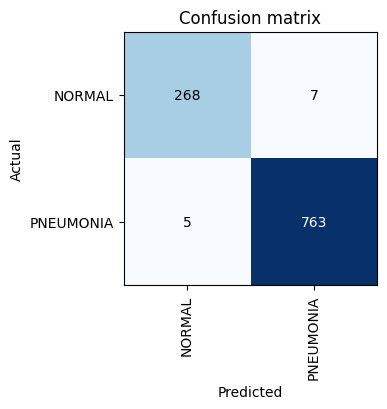

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

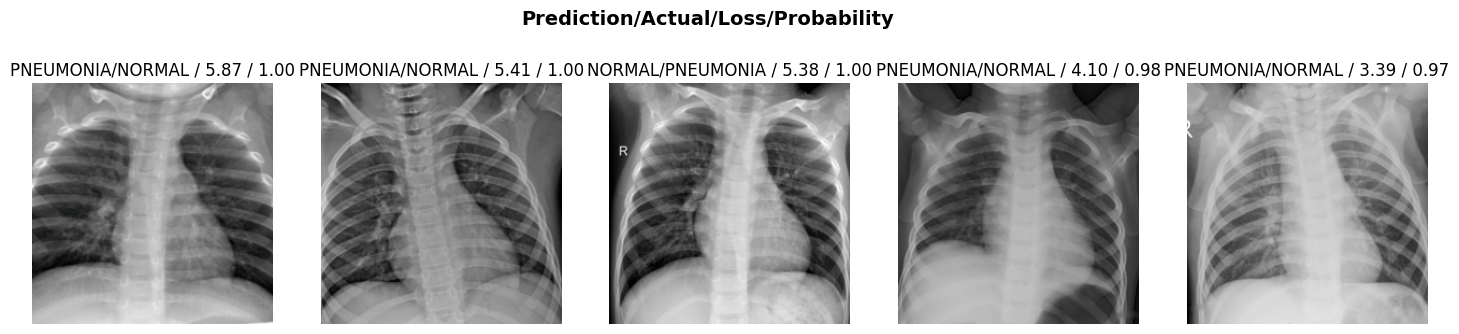

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(18,4))

In [ ]:
test_files = get_image_files(path/'test')

for f in test_files[:5]:
  img=PILImage.create(f)
  pred, pred_idx, probs = learn.predict(img)
  print(f"Rasm: {f.name} --> Bashorat: {pred} ({probs[pred_idx]*100:.2f}%)")

Rasm: test_img_10175.jpeg --> Bashorat: NORMAL (100.00%)


Rasm: test_img_10086.jpeg --> Bashorat: PNEUMONIA (99.35%)


Rasm: test_img_10208.jpeg --> Bashorat: PNEUMONIA (99.87%)


Rasm: test_img_10201.jpeg --> Bashorat: NORMAL (99.93%)


Rasm: test_img_10174.jpeg --> Bashorat: PNEUMONIA (99.90%)


In [ ]:
learn.export("pneumonia_classifier.pkl")